In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


## Option 1

In [2]:
df01 = pd.read_csv('../data/sliding01.csv', sep=',', index_col=0)
df01.head()

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,H,1.36,4.50,9.00,5,3,2,14,10,2,2,6,8,14
1,D,2.25,3.00,3.50,3,4,3,16,12,4,3,3,14,12
2,D,2.80,3.00,2.70,5,2,3,10,8,4,4,2,15,13
3,A,1.91,3.25,4.33,5,3,2,18,11,3,3,4,10,11
4,H,2.10,3.00,4.00,2,4,4,6,9,1,6,3,7,10


In [3]:
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
categorical_cols = ['result']
df01.loc[:, categorical_cols] = df01[categorical_cols].apply(lambda col: le.fit_transform(col))

df01

,result,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,away-wins,away-draws,away-losses,away-goals,away-opposition-goals
0,2,1.36,4.50,9.00,5,3,2,14,10,2,2,6,8,14
1,1,2.25,3.00,3.50,3,4,3,16,12,4,3,3,14,12
2,1,2.80,3.00,2.70,5,2,3,10,8,4,4,2,15,13
3,0,1.91,3.25,4.33,5,3,2,18,11,3,3,4,10,11
4,2,2.10,3.00,4.00,2,4,4,6,9,1,6,3,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20818,2,5.00,3.80,1.70,3,2,5,8,15,2,4,4,10,21
20819,2,2.00,3.60,3.70,3,3,4,10,19,1,4,5,7,21
20820,2,1.80,3.75,4.50,3,4,3,10,9,5,2,3,15,9
20821,2,1.33,5.25,9.00,2,3,5,12,14,3,3,4,11,16


In [4]:
y01= df01['result']
X01 = df01.loc[:, df01.columns != 'result']
normalized_X01 = preprocessing.normalize(X01)
normalized_X01

array([[0.04995749, 0.16530052, 0.33060104, ..., 0.2204007 , 0.29386759,
        0.51426829],
       [0.07789654, 0.10386205, 0.12117239, ..., 0.10386205, 0.48468955,
        0.41544819],
       [0.1093108 , 0.11711872, 0.10540685, ..., 0.07807914, 0.58559359,
        0.50751444],
       ...,
       [0.07369672, 0.15353484, 0.1842418 , ..., 0.12282787, 0.61413935,
        0.36848361],
       [0.04434981, 0.17506504, 0.3001115 , ..., 0.13338289, 0.36680294,
        0.53353155],
       [0.05579105, 0.14031283, 0.17539103, ..., 0.16703908, 0.46770942,
        0.66815631]])

In [5]:
X01_train, X01_test, y01_train, y01_test = train_test_split(X01,y01,test_size=0.2, random_state=4,shuffle=False)

In [6]:
print(X01_train.shape)
print(X01_test.shape)
print(y01_train.shape)
print(y01_test.shape)

(16658, 13)
(4165, 13)
(16658,)
(4165,)


KNN needs k value, which cannot be easily defined. One approach/estimation is to use the square root of the number of samples --> sqrt(20823) = 144

In [7]:
# run from k=1 through 150 and record accuracy
k_range = range(1,151)
scores_dict = {}
scores_list = []
for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X01_train, y01_train)
	y01_pred=knn.predict(X01_test)
	scores_dict[k] = metrics.accuracy_score(y01_test,y01_pred)
	scores_list.append(metrics.accuracy_score(y01_test,y01_pred))

Text(0, 0.5, 'testing accuracy')

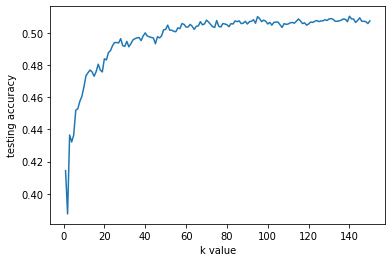

In [8]:
plt.plot(k_range,scores_list)
plt.xlabel("k value")
plt.ylabel("testing accuracy")

In [18]:
accuracies = np.array(scores_list)
max_accuracy = accuracies.max()
print(max_accuracy)
print(accuracies.argmax())

0.5102040816326531
139


k=139 seams to be an appropriate choice

In [19]:
knn01=KNeighborsClassifier(n_neighbors=139)
knn01.fit(X01,y01)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=139, p=2,
                     weights='uniform')

## Option 2

In [25]:
df02 = pd.read_csv('../data/sliding02_shots.csv', sep=',', index_col=0)
le = LabelEncoder()
categorical_cols = ['result']
df02.loc[:, categorical_cols] = df02[categorical_cols].apply(lambda col: le.fit_transform(col))

y02= df02['result']
X02 = df02.loc[:, df02.columns != 'result']
normalized_X02 = preprocessing.normalize(X02)

X02_train, X02_test, y02_train, y02_test = train_test_split(X02,y02,test_size=0.2, random_state=4,shuffle=False)
print(X02_train.shape)
print(X02_test.shape)
print(y02_train.shape)
print(y02_test.shape)

(5626, 21)
(1407, 21)
(5626,)
(1407,)


In [27]:
# run from k=1 through 150 and record accuracy
k_range = range(1,151)
scores_dict = {}
scores_list = []
for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X02_train, y02_train)
	y02_pred=knn.predict(X02_test)
	scores_dict[k] = metrics.accuracy_score(y02_test,y02_pred)
	scores_list.append(metrics.accuracy_score(y02_test,y02_pred))

Text(0, 0.5, 'testing accuracy')

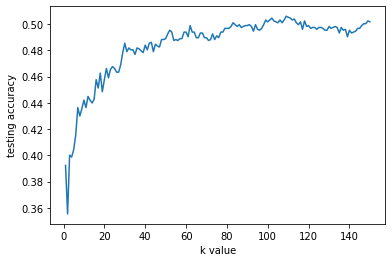

In [28]:
plt.plot(k_range,scores_list)
plt.xlabel("k value")
plt.ylabel("testing accuracy")

In [29]:
accuracies = np.array(scores_list)
max_accuracy = accuracies.max()
print(max_accuracy)
print(accuracies.argmax())

0.5060412224591329
108


k=108 seams to be an appropriate choice

In [30]:
knn02=KNeighborsClassifier(n_neighbors=108)
knn02.fit(X02,y02)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=108, p=2,
                     weights='uniform')

## Option 3

In [31]:
df03 = pd.read_csv('../data/sliding03_shots_extra.csv', sep=',', index_col=0)
le = LabelEncoder()
categorical_cols = ['result']
df03.loc[:, categorical_cols] = df02[categorical_cols].apply(lambda col: le.fit_transform(col))

y03= df03['result']
X03 = df03.loc[:, df03.columns != 'result']
normalized_X03 = preprocessing.normalize(X03)

X03_train, X03_test, y03_train, y03_test = train_test_split(X03,y03,test_size=0.2, random_state=4,shuffle=False)
print(X03_train.shape)
print(X03_test.shape)
print(y03_train.shape)
print(y03_test.shape)

(5626, 29)
(1407, 29)
(5626,)
(1407,)


In [32]:
# run from k=1 through 150 and record accuracy
k_range = range(1,151)
scores_dict = {}
scores_list = []
for k in k_range:
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X03_train, y03_train)
	y03_pred=knn.predict(X03_test)
	scores_dict[k] = metrics.accuracy_score(y03_test,y03_pred)
	scores_list.append(metrics.accuracy_score(y03_test,y03_pred))

Text(0, 0.5, 'testing accuracy')

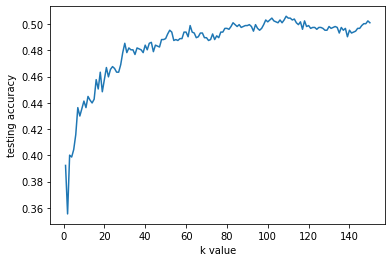

In [33]:
plt.plot(k_range,scores_list)
plt.xlabel("k value")
plt.ylabel("testing accuracy")

In [34]:
accuracies = np.array(scores_list)
max_accuracy = accuracies.max()
print(max_accuracy)
print(accuracies.argmax())

0.5060412224591329
108


k=108 seams to be an appropriate choice

In [35]:
knn03=KNeighborsClassifier(n_neighbors=108)
knn03.fit(X03,y03)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=108, p=2,
                     weights='uniform')